In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


In [303]:
df=pd.read_csv('./data/confirmed_cases.csv')

df.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [304]:
df1=df.drop(columns=['country_name','region_code','region_name','jurisdiction','Unnamed: 0'])

In [306]:
df1=df1.groupby('country_code').agg('sum')
df1.head()

,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,10Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [307]:

df1 = df1.transpose()
df1.columns.name = 'Dates'

In [308]:
df1.head()

Dates,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
01Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
df2=df1.fillna(0)
df2.index = pd.to_datetime(df2.index)
df2.head()

Dates,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 2000x1000 with 0 Axes>

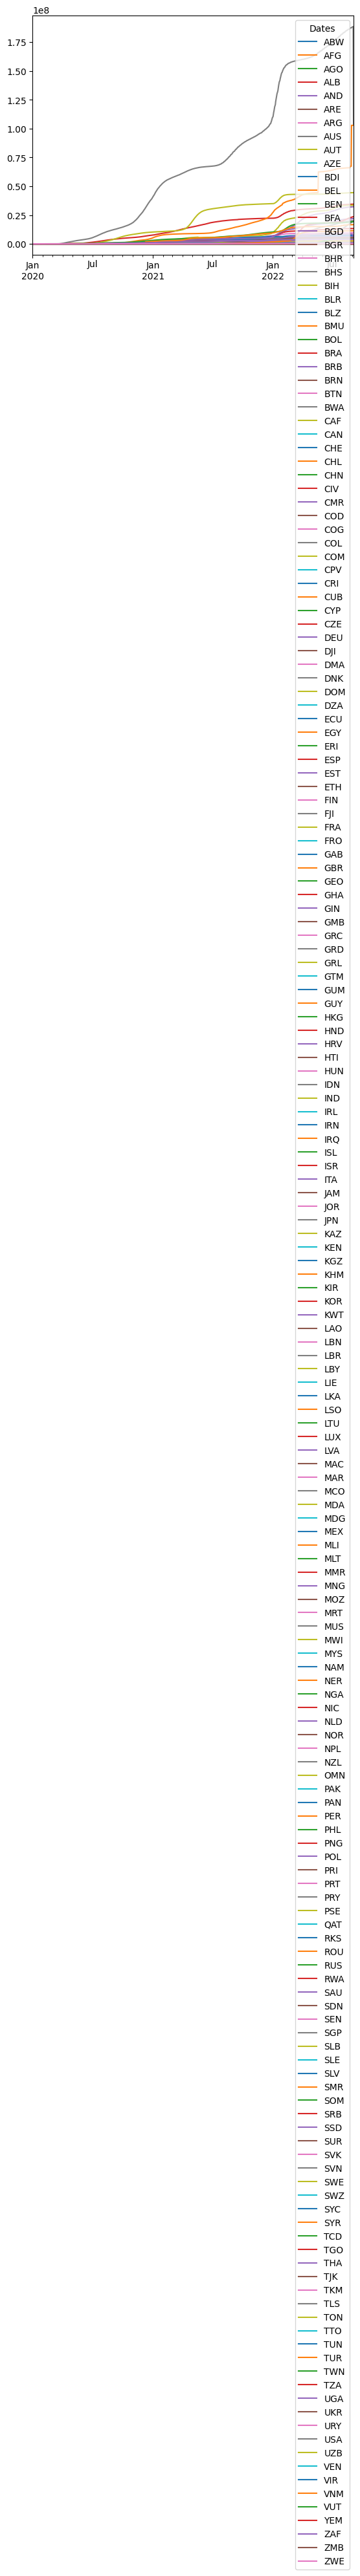

In [286]:
plt.figure(figsize=(20,10))
df2.plot();

Text(0.5, 0, 'Date')

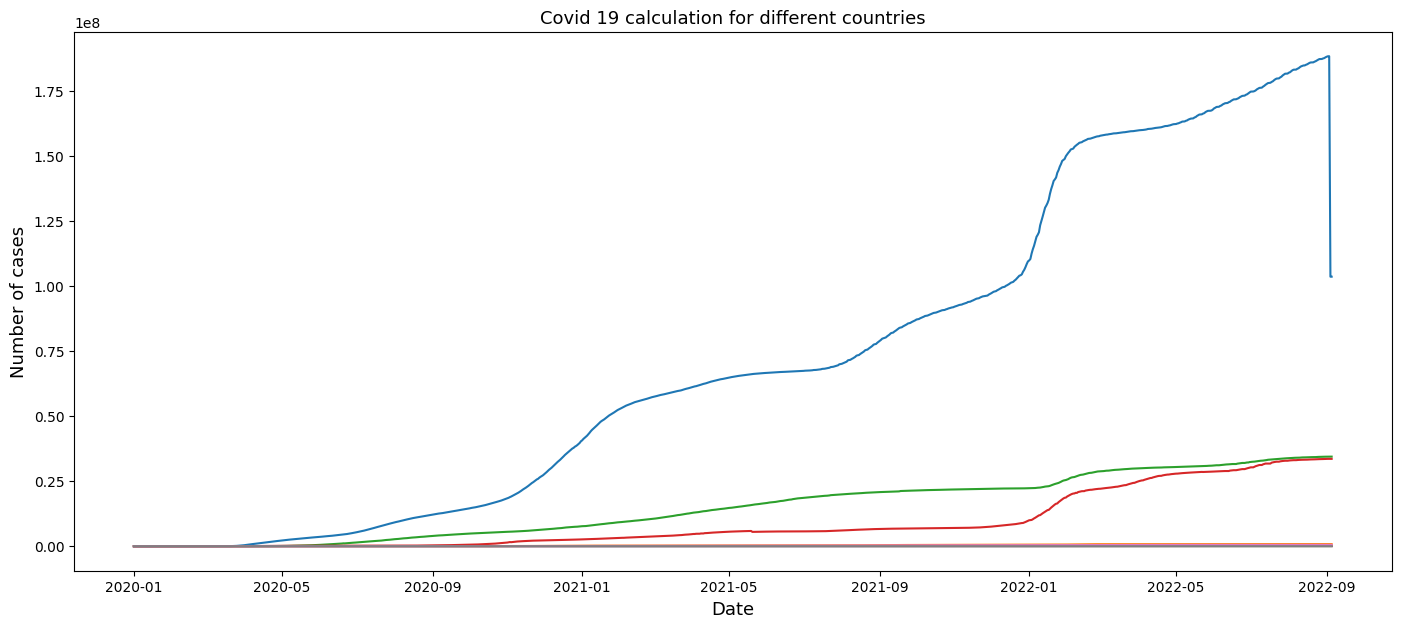

In [297]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(df2[['USA','AZE','BRA','FRA','MLT','LSO','LBY','MAC']]);
ax.set_title("Covid 19 calculation for different countries", size=13)
ax.set_ylabel("Number of cases", size=13)
ax.set_xlabel("Date", size=13)

In [276]:
df3=df2['USA']

In [274]:
df3

2020-01-01            0.0
2020-01-02            0.0
2020-01-03            0.0
2020-01-04            0.0
2020-01-05            0.0
                 ...     
2022-09-01    188271143.0
2022-09-02    188434370.0
2022-09-03    188451479.0
2022-09-04    103658521.0
2022-09-05    103658521.0
Name: USA, Length: 979, dtype: float64

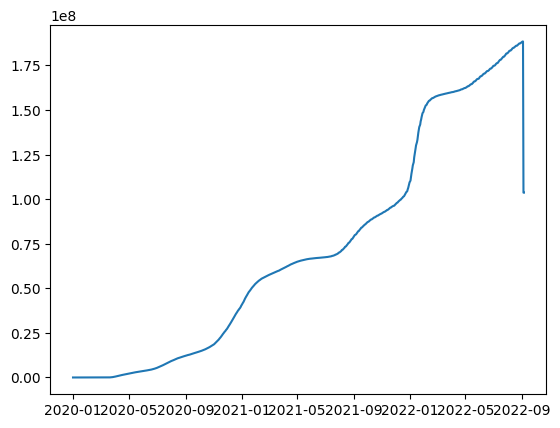

In [277]:
plt.plot(df2['USA'])


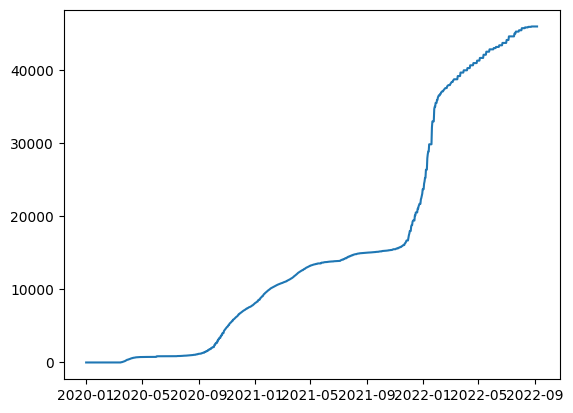

In [278]:
plt.plot(df2['AND'])

In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(df2["USA"], model="additive")

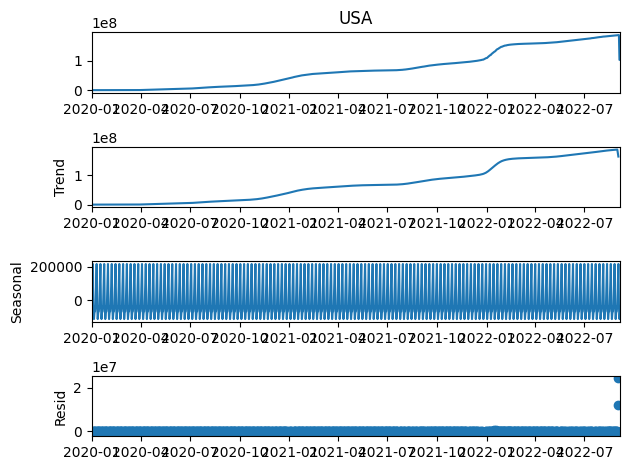

In [283]:
decomp_add.plot();

In [310]:
df.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42750.0,42750.0,42792.0,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42848.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,191967.0,192463.0,192906.0,193004.0,193250.0,193520.0,193520.0,193912.0,193912.0,193912.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,328299.0,328515.0,328571.0,329017.0,329352.0,329615.0,329862.0,330062.0,330062.0,330062.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [319]:
df_usa=df[df['country_code']=='USA']

In [320]:
df_usa.head()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,27Aug2022,28Aug2022,29Aug2022,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022
202,203,USA,United States,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,94197793.0,94204626.0,94306725.0,94378287.0,94531854.0,94650029.0,94732814.0,94742293.0,94742293.0,94742293.0
203,204,USA,United States,US_AK,Alaska,STATE_TOTAL,NaN,NaN,NaN,NaN,...,293076.0,293076.0,293076.0,293076.0,294498.0,294498.0,294498.0,294498.0,174828.0,174828.0
204,205,USA,United States,US_AL,Alabama,STATE_TOTAL,NaN,NaN,NaN,NaN,...,1479605.0,1479605.0,1479605.0,1479605.0,1479605.0,1494300.0,1494300.0,1494300.0,174828.0,174828.0
205,206,USA,United States,US_AR,Arkansas,STATE_TOTAL,NaN,NaN,NaN,NaN,...,929156.0,929608.0,930076.0,931459.0,932639.0,933962.0,935181.0,936005.0,174828.0,174828.0
206,207,USA,United States,US_AZ,Arizona,STATE_TOTAL,NaN,NaN,NaN,NaN,...,2245713.0,2245713.0,2245713.0,2245713.0,2254374.0,2254374.0,2254374.0,2254374.0,174828.0,174828.0


In [321]:
df_usa=df_usa.drop(columns=['country_name','region_name','jurisdiction','Unnamed: 0','country_code'])

In [322]:
df_usa=df_usa.set_index('region_code')

In [323]:
df_usa = df_usa.transpose()

In [324]:
df_usa.head()

region_code,NaN,US_AK,US_AL,US_AR,US_AZ,US_CA,US_CO,US_CT,US_DC,US_DE,...,US_SD,US_TN,US_TX,US_UT,US_VA,US_VT,US_WA,US_WI,US_WV,US_WY
01Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Jan2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df_usa.index = pd.to_datetime(df_usa.index)
df_usa=df_usa.fillna(0)

In [328]:
df_usa.head()

region_code,NaN,US_AK,US_AL,US_AR,US_AZ,US_CA,US_CO,US_CT,US_DC,US_DE,...,US_SD,US_TN,US_TX,US_UT,US_VA,US_VT,US_WA,US_WI,US_WV,US_WY
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Date')

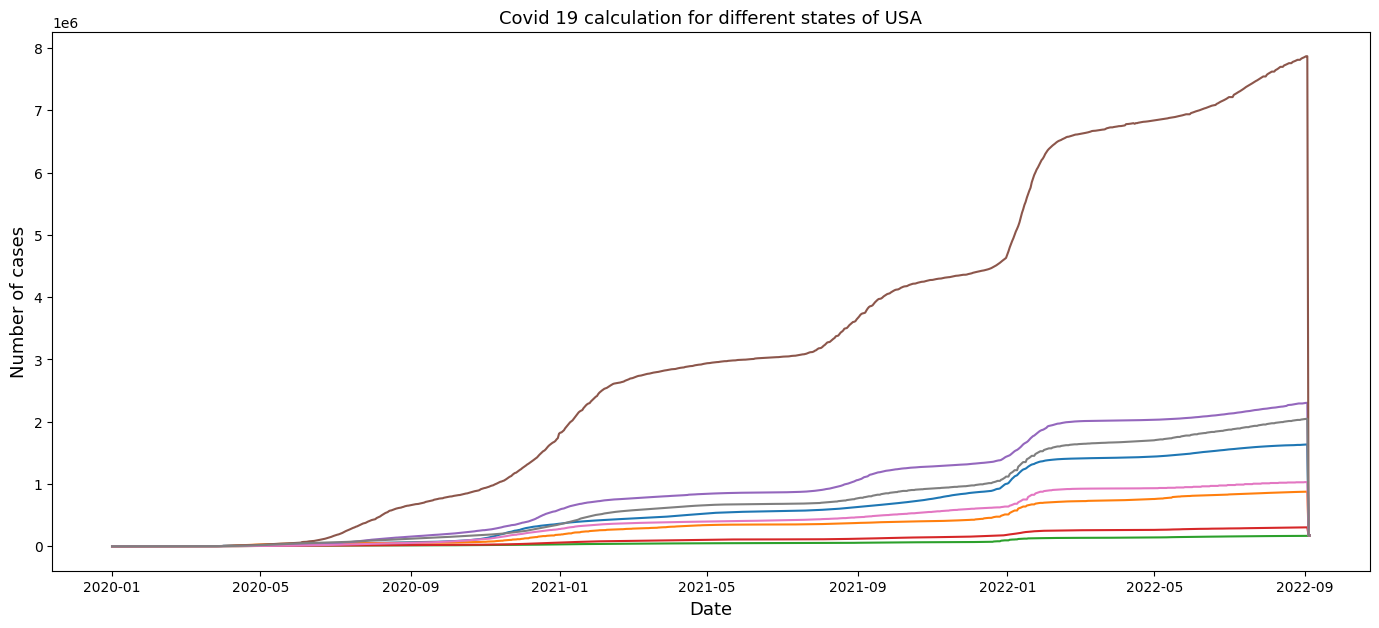

In [332]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(df_usa[['US_CO','US_CT','US_DC','US_DE','US_TN','US_TX','US_UT','US_VA']])
ax.set_title("Covid 19 calculation for different states of USA", size=13)
ax.set_ylabel("Number of cases", size=13)
ax.set_xlabel("Date", size=13)